<a href="https://colab.research.google.com/github/Jayesh2422/ML_LAB/blob/main/ML_LAB%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_data_upload.csv')

df = df.replace({
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0,
    'Positive': 1,
    'Negative': 0,
})

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
df.info()
print(df.isnull().sum())

<class 'pandas.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 non-null    o

In [3]:
numeric_cols = df.select_dtypes(include="number").columns

In [4]:
print("Statistical Summary:")
print(df[numeric_cols].describe())


Statistical Summary:
              Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000


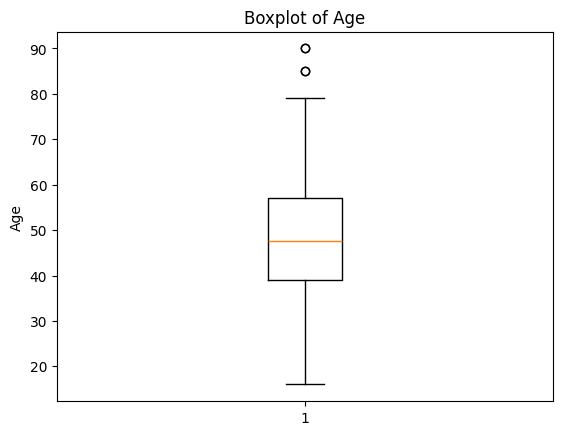

In [5]:
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

In [6]:
df_clean = df.copy()

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[
        (df_clean[col] >= lower_bound) &
        (df_clean[col] <= upper_bound)
    ]

print("Shape after outlier removal:", df_clean.shape)

Shape after outlier removal: (516, 17)


In [7]:
correlation_matrix = df_clean[numeric_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
     Age
Age  1.0


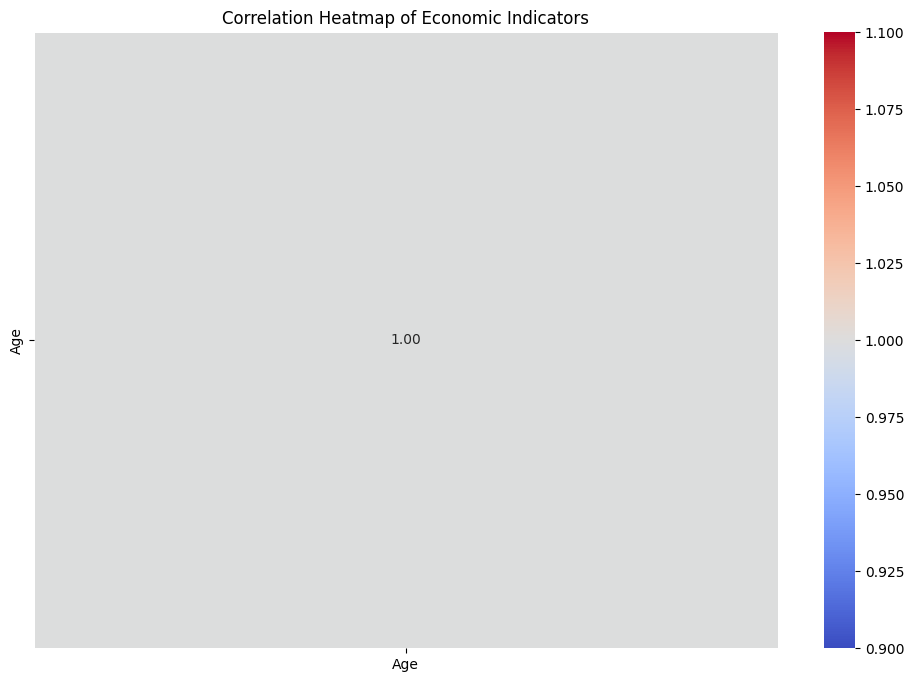

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_clean.select_dtypes(include="number").corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Economic Indicators")
plt.show()

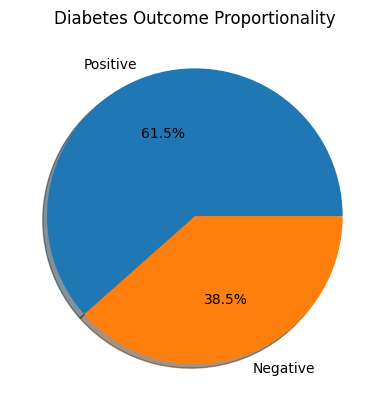

In [9]:
import matplotlib.pyplot as plt

df['Diabetes_Outcome'] = df['class'].apply(lambda x: 'Positive' if x == 1 else 'Negative')

outcome_counts = df['Diabetes_Outcome'].value_counts()

plt.figure()
plt.pie(
    outcome_counts,
    labels=outcome_counts.index,
    autopct='%.1f%%',
    shadow=True
)
plt.title('Diabetes Outcome Proportionality')
plt.show()

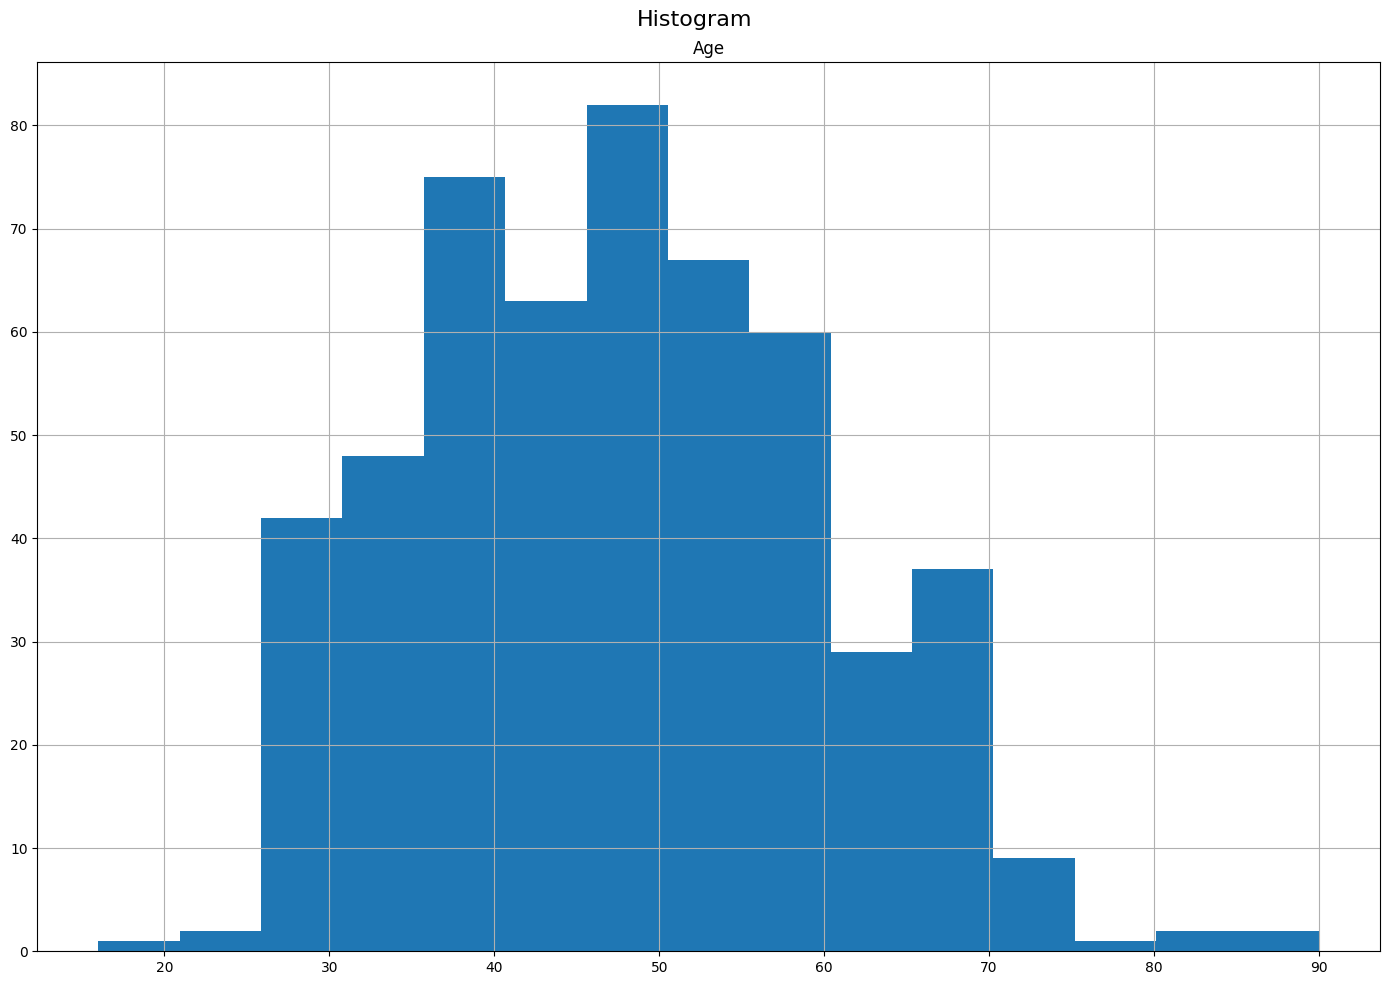

In [10]:
df[numeric_cols].hist(
    bins=15,
    figsize=(14, 10)
)

plt.suptitle("Histogram", fontsize=16)
plt.tight_layout()
plt.show()
